***
## With a suitable example demonstrate the perceptron learning law with its decision regions using python. Give the output in graphical form.
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def perceptron(x, w, b):
    return np.sign(np.dot(x, w) + b)

In [4]:
def perceptron_learning(X, Y, eta, epochs):
    w = np.zeros(2)
    b = 0
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            y_pred = perceptron(X[i], w, b)
            
            if y_pred != Y[i]:
                w += eta * Y[i] * X[i]
                b += eta * Y[i]

    return w, b

In [5]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y = np.array([-1, -1, -1, 1])

In [6]:
w, b = perceptron_learning(X, Y, eta=1, epochs=10)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = np.array([perceptron(np.array([x, y]), w, b) for x, y in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

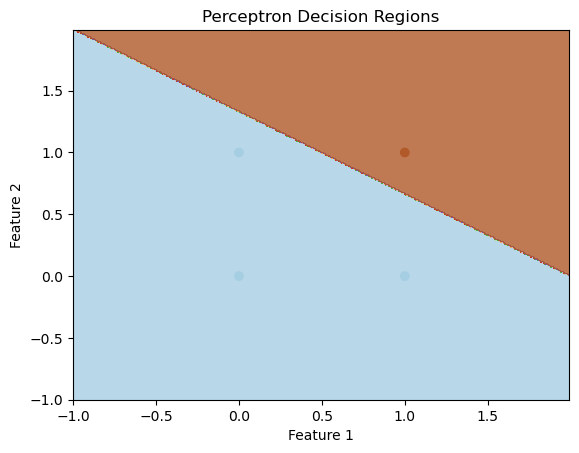

In [7]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Perceptron Decision Regions')
plt.show()